# Reading and using a converted skymap

## Initializing a reader

In [1]:
import skymap_convert.presets as sc_presets
from skymap_convert import ConvertedSkymapReader

There are 3 ways to initialize a ConvertedSkymapReader:
1. With a manually created path
2. With a path included in the `presets` module
3. With the `presests` parameter

### 1. Using a manually created path

In [2]:
from pathlib import Path

package_root = Path.home() / "skymap-convert"
converted_skymap_path = package_root / "src" / "skymap_convert" / "converted_skymaps"

reader = ConvertedSkymapReader(converted_skymap_path / "lsst_skymap")

### 2. Using a preset path

In [3]:
lsst_skymap_path = sc_presets.get_preset_path("lsst_skymap")

reader = ConvertedSkymapReader(lsst_skymap_path)

### 3. Using the preset parameter

In [4]:
reader = ConvertedSkymapReader(preset="lsst_skymap")

Note: you can view available presets using the `list_available_presets` method.  

In [5]:
sc_presets.list_available_presets()

['lsst_skymap']

As you convert your own skymaps and add them to the `converted_skymaps/` directory, they will also show up in this list.

## Using a reader

See the available public methods using `help`.

In [6]:
reader.help()

ConvertedSkymapReader - Available Methods

  cleanup              - Delete the temporary decompressed patches file, if it exists.
  get_patch_vertices   - Return the RA/Dec vertices of the specified patch.
  get_pole_tract_ids   - Return the tract IDs that correspond to the poles.
  get_tract            - Return tract data for a given ID (slated for deprecation).
  get_tract_vertices   - Return the outer RA/Dec vertices of the specified tract.
  help                 - Display available public methods and their descriptions.
  plot_patches         - Plot multiple patches in a single figure.
  summarize            - Print a summary of the converted skymap contents.

For detailed information about any method, use: help(reader.method_name)


Call `summarize` to take a peek at the contents of the converted skymap.

In [7]:
reader.summarize()

Skymap Summary
----------------------------------------
Path:               /sdf/home/o/olynn/skymap-convert/src/skymap_convert/converted_skymaps/lsst_skymap
Name:               converted_skymap
Generated:          2025-07-14T14:29:23.620090Z
Metadata keys:      ['format_version', 'generated', 'n_patches_per_tract', 'n_tracts', 'name']
Number of tracts:   18938
Patches per tract:  100
Tracts file path:   /sdf/home/o/olynn/skymap-convert/src/skymap_convert/converted_skymaps/lsst_skymap/tracts.npy
Tracts file size:   1.21 MB
Patches file path:  /lscratch/olynn/tmpi5_c32qj.npy
Patches file size:  121.20 MB


Use `get_tract_vertices` and `get_patch_vertices` to access the data.

In [8]:
reader.get_tract_vertices(42)

[[237.27272727272728, -86.28099173553719],
 [253.63636363636365, -86.28099173553719],
 [253.63636363636365, -84.79338842975206],
 [237.27272727272728, -84.79338842975206]]

In [9]:
reader.get_patch_vertices(1234, 56)

[[353.19436746094334, -61.733705740129906],
 [353.5462936615678, -61.73505840062234],
 [353.54818789227375, -61.568395336612376],
 [353.19815518019567, -61.567052069980534]]

## Basic plotting

Call `plot_patches` to plot tracts and patches. 

*See the plotting notebook for more detail.*

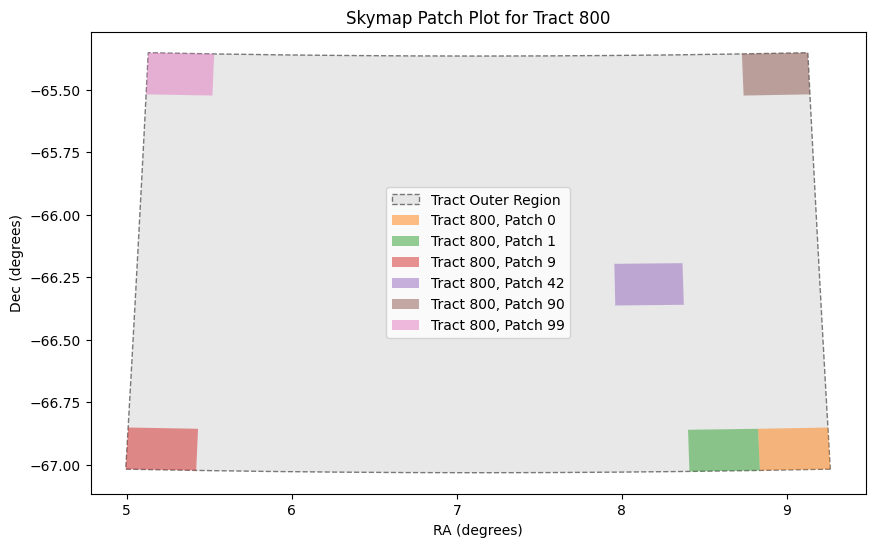

In [10]:
tract_id = 800

reader.plot_patches(
    [
        (tract_id, 0),
        (tract_id, 1),
        (tract_id, 9),
        (tract_id, 42),
        (tract_id, 90),
        (tract_id, 99),
    ],
    margin=0.05,
    tract_outer_boundaries=tract_id,
)

To see usage examples of the skymap reader in action, check out the [tract_patch_search](https://github.com/astronomy-commons/lsdb-rubin/blob/main/src/lsdb_rubin/tract_patch_search.py) in [lsdb-rubin](https://github.com/astronomy-commons/lsdb-rubin), a package that contains LSST-specific LSDB operations and demonstrations.

## Clean up temp files

In [11]:
reader.cleanup()

## About  

**Author:** Olivia Lynn

**Last updated on:** July 14, 2025